## WEEK 8, IN-MODULE EXERCISES
- For both your in-module exercises and homework assignment this week, you'll be working with *radiative flux* data from NASA's CERES project!
<br><br>
- Since many of you work with, or are at least acquainted with, study of Earth's climate, this seems to be a particularly good dataset to have you explore

### What is the data?
- Monthly and climatological (long-term) means of various radiative fluxes:  https://asdc.larc.nasa.gov/project/CERES, https://ceres.larc.nasa.gov/

### How is the data collected?
- By instruments on satellites through the Clouds and the Earth's Radiant Energy System project (CERES)

### Why do we care about radiative fluxes?
- the Earth's climate is controlled by how much solar radiation (from the Sun) is absorbed by the earth vs. how much longwave (infrared) radiation is emitted to space - *energy budget*

### What variables are we focusing on in this assignment?
- some of the variables we're interested in, specificially, are
  - **toa_sw_all_mon**: outgoing shortwave (solar) radiative flux (leaving the top of the atmosphere) 
  - **toa_lw_all_mon**: outgoing longwave radiative flux (leaving the top of the atmosphere)
  - **toa_net_all_mon**: net radiative flux at the top of the atmosphere 
  - **solar_mon**:  incoming shortwave (solar) radiative flux at the top of the atmosphere
- more details to follow when needed!

### Some more details on Earth's energy budget, if you're less familiar

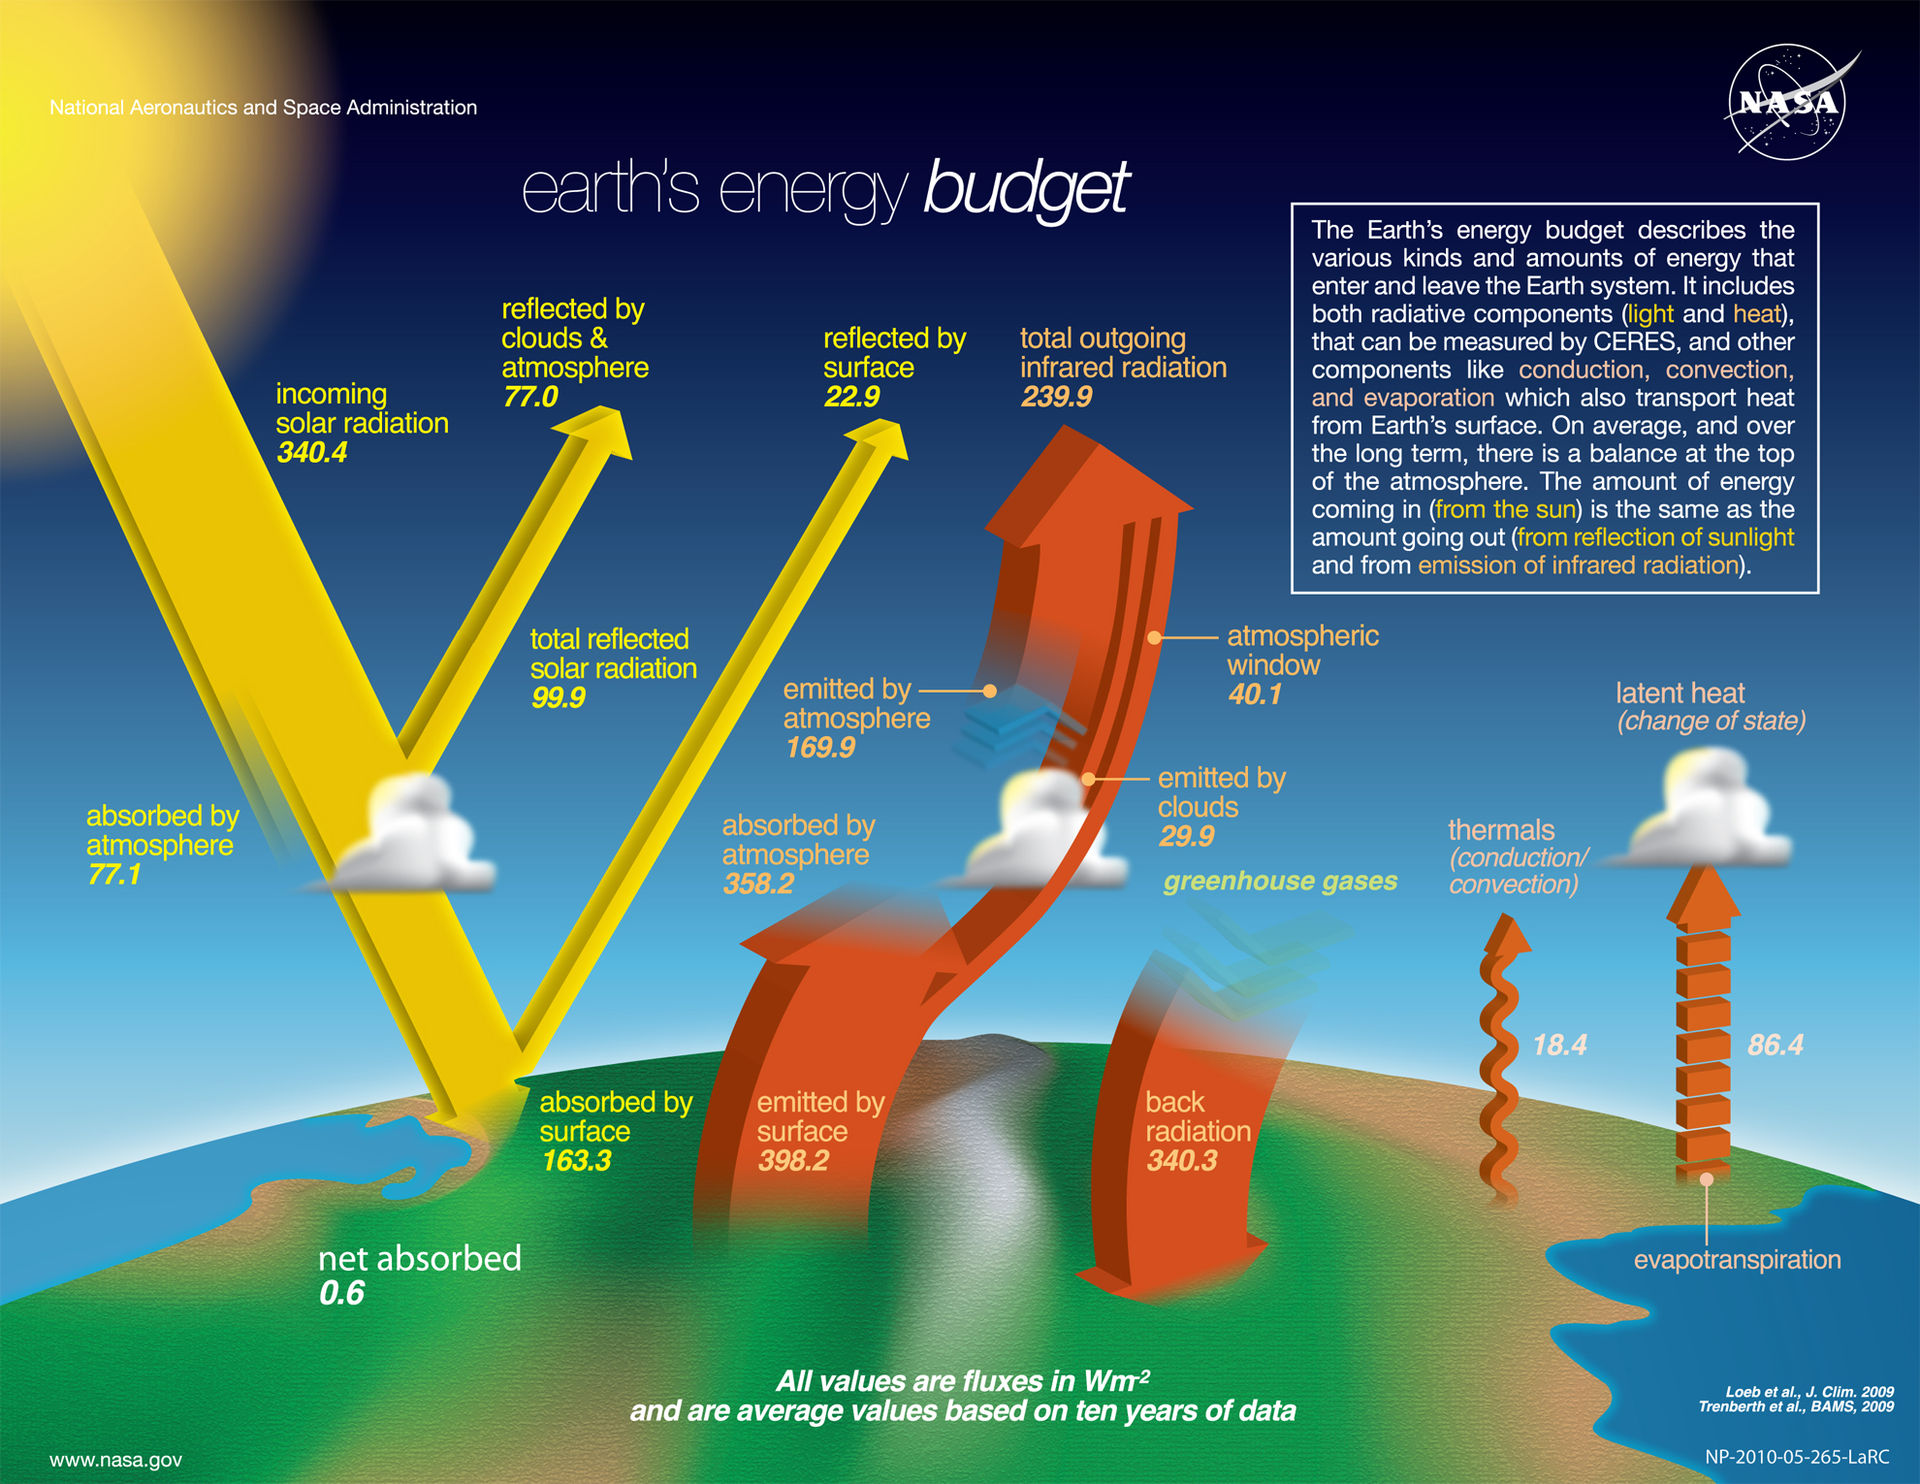
- Access a nice diagram of the Earth's energy budget here: https://mynasadata.larc.nasa.gov/basic-page/earths-energy-budget

#### (1)  Import needed modules

In [1]:
# You MAY need to import the netcdf4 module
# Not doing so threw up an error for me when I tested this in Colab
# When trying to read in the radiation data

import xarray as xr
import cartopy.crs as ccrs # Cartopy map projections
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
import numpy as np

#### (2)  This dataset is almost 1 GB in size... let's access it *but not download it* through OPeNDAP interface (#fancy)  (FYI more on OPeNDAP: https://www.earthdata.nasa.gov/engage/open-data-services-software/earthdata-developer-portal/opendap ) 

#### More metadata/informatin on this dataset:  https://asdc.larc.nasa.gov/project/CERES/CERES_EBAF-TOA_Edition4.1

In [2]:
#data = xr.open_dataset('CERES_EBAF-TOA_Edition4.1_200003-202203.nc')

# Also available on Box if needed - let me know if you need link (that is on Canvas page for this submission)

data = xr.open_dataset('https://opendap.larc.nasa.gov/opendap/CERES/EBAF/TOA_Edition4.1/CERES_EBAF-TOA_Edition4.1_200003-202203.nc')

#### (3)  Let's evaluate variables and coordinates - always a good first step
- (a.) What are the dimensions of these four variables we're focusing on - specifically, the named coordinates associated with them?  Please access this using a specific *attribute* of the dataset (rather than just print(dataset) and reading off coordinates from that)
<br><br>
- (b.) Is the longitude coordinates in the 0 to 360 E system, or the 180 W to 180 E system?
<br><br>
- (c.) What is the *direction* of the order of each the lat coordinates and the lon coordinates?  This is key to know if we're SLICING at any point in our indexing, yes?
<br><br>
- (d.) What are the units of each of these four variables?
<br><br>
- (e.) What years does this dataset span?  What is the time interval between observations?

In [3]:
# (a.)
print(data['toa_sw_all_mon'].coords)
print(data['toa_lw_all_mon'].coords)
print(data['toa_net_all_mon'].coords)
print(data['solar_mon'].coords)

# The dimensions are time, lat, and lon

Coordinates:
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2kB 2000-03-15 2000-04-15 ... 2022-03-15
Coordinates:
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2kB 2000-03-15 2000-04-15 ... 2022-03-15
Coordinates:
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2kB 2000-03-15 2000-04-15 ... 2022-03-15
Coordinates:
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2kB 2000-03-15 2000-04-15 ... 2022-03-15


In [4]:
# (b.)
# Longitude is in the 0-360E degree system.


In [5]:
# (c.)

# The direction for lon coordinates is 0 to 360
# The direction for lat coordinates is -90 to 90

In [6]:
# (d.) 

print(data['toa_sw_all_mon'].attrs['units'])
print(data['toa_lw_all_mon'].attrs['units'])
print(data['toa_net_all_mon'].attrs['units'])
print(data['solar_mon'].attrs['units'])

# All of them are in units of W m^-2


W m-2
W m-2
W m-2
W m-2


In [7]:
# (e.)
print('Data spans from', data.time[0].values,'to', data.time[-1].values)

# This dataset spans from 2000 to 2022 with monthly time intervals.

Data spans from 2000-03-15T00:00:00.000000000 to 2022-03-15T00:00:00.000000000


#### (4)  Let's practice accessing elements!
*For the nearest gridpoint to Urbana-Champaign,recall approx 40 degree N, -88 deg E, access and plot each of the following:*

#### !!!!! You will use this Urbana-Champaign data for this Q, Q5 + Q6! !!!!
- (a.)  Monthly time series of outgoing longwave radiative flux
<br><br>
- (b.)  Monthly time series of outgoing shortwave radiative flux
<br><br>
- (c.)  Monthly time series of incoming solar (shortwave) radiative flux

**NOTE**: you can use plotting shortcuts in Xarray, or directly plot using Matplotlib. Don't fuss too much about changing labels unless you feel inspired to
<br><br>
**OPTIONAL CHALLENGE**: plot all three of these on the same, single, line plot, and include a legend

In [8]:
# Select nearest point based on UIUC coordinates
data_uiuc = data.sel(lat=40,lon=-88+360, method='nearest')
data_uiuc.coords

Coordinates:
    lon      float32 4B 272.5
    lat      float32 4B 40.5
  * ctime    (ctime) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 2kB 2000-03-15 2000-04-15 ... 2022-03-15

In [9]:
# Select radiation variables
out_lw = data_uiuc['toa_lw_all_mon'] # Outgoing longwave
out_sw = data_uiuc['toa_sw_all_mon'] # Outgoing shortwave
in_sw = data_uiuc['solar_mon'] # Incoming shortwave
times = data_uiuc.time # Times

Text(0.5, 0, 'Time')

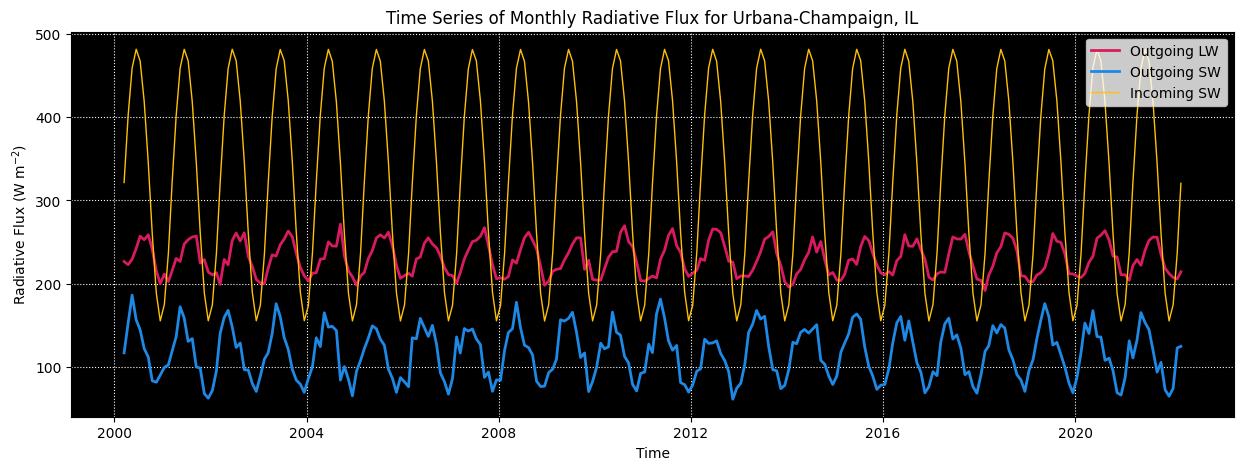

In [10]:
# Create plot
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(times, out_lw, c='#D81B60', label='Outgoing LW', linewidth=2)
ax.plot(times, out_sw, c='#1E88E5', label='Outgoing SW', linewidth=2)
ax.plot(times, in_sw, c="#FFC107", label='Incoming SW', linewidth=1)

ax.legend(loc=0)
ax.set_facecolor('black')
ax.grid(True, axis='both', linestyle=':', color='white')
ax.set_title('Time Series of Monthly Radiative Flux for Urbana-Champaign, IL')
ax.set_ylabel('Radiative Flux (W m$^{-2}$)')
ax.set_xlabel('Time')

#### (5)  Generally speaking, describe a common pattern/trend that you see in these time series, in at least two sentences.

I see a clear seasonality to the data, as you can clearly make out an annual spike in both the outgoing and incoming radiation fluxes. I also notice that the incoming SW radiation flux spikes to much higher level than either outgoing SW or LW radiative flux. My presumption is that these spikes occur during the summer when incoming solar radiation is at its peak for this location. The fact that the outgoing radiation fluxes are also lower than the incoming radiation is indicative of the greenhouse effect and that not all incoming radiation is getting radiated back out into space.

#### (6) Let's practice finding max and minimum radiative fluxes and when they occur ONLY USING THE UIUC DATA FROM Q4
- (a.) Access the data but just for the year 2017, using sel
<br><br>
- (b.) Find the month in 2017 when the maximum occured, and when the minimum occured, for **incoming shortwave radiative flux (aka incoming solar radiation)**
<br><br>
- (c.) Then, find the actual values of the maximum and minimum incoming shortwave flux associated with the data at these times
<br><br>
- (d.) Do your answers to (b.) make sense, physically? Why or why not?

**OPTIONAL CHALLENGE**:  Plot the time series in Urbana-Champaign just for 2017, and indicate/annotate in a way of your choice when the maximum and minimum occur.

**HINTS**
- for (b.), no need to parse year/month using Python as you haven't learned how to do that yet - the full time strings will suffice!

In [11]:
# (a.) 
data2017 = data_uiuc.sel(time='2017')
data2017

<xarray.Dataset> Size: 3kB
Dimensions:                        (ctime: 12, sc: 2, time: 12)
Coordinates:
    lon                            float32 4B 272.5
    lat                            float32 4B 40.5
  * ctime                          (ctime) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * time                           (time) datetime64[ns] 96B 2017-01-15 ... 2...
Dimensions without coordinates: sc
Data variables: (12/67)
    climatology_bounds             (ctime, sc) int32 96B ...
    toa_sw_all_mon                 (time) float32 48B 94.28 89.65 ... 68.57
    toa_lw_all_mon                 (time) float32 48B 204.5 211.8 ... 205.6
    toa_net_all_mon                (time) float32 48B ...
    toa_sw_clr_c_mon               (time) float32 48B ...
    toa_lw_clr_c_mon               (time) float32 48B ...
    ...                             ...
    gtoa_net_clr_c_clim            (ctime) float32 48B ...
    gsolar_clim                    (ctime) float32 48B ...
    gcldarea_total_daynight_clim   (ctime) float32 48B ...
    gcldpress_total_daynight_clim  (ctime) float32 48B ...
    gcldtemp_total_daynight_clim   (ctime) float32 48B ...
    gcldtau_total_day_clim         (ctime) float32 48B ...
Attributes:
    title:                           CERES EBAF (Energy Balanced and Filled) ...
    institution:                     NASA/LaRC (Langley Research Center) Hamp...
    Conventions:                     CF-1.4
    comment:                         Climatology from 07/2005 to 06/2015
    version:                         Edition 4.1; Release Date May 28, 2019
    DOI:                             10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1
    Fill_Value:                      Fill Value is -999.0
    DODS_EXTRA.Unlimited_Dimension:  time

In [12]:
# (b.)

print('Max incoming solar radiation in:',data2017['solar_mon'].idxmax().values) # June
print('Min incoming solar radiation in:',data2017['solar_mon'].idxmin().values) # December

# Sanity check
# Max incoming solar radiation in: 2017-06-15T00:00:00.000000000
# Min incoming solar radiation in: 2017-12-15T00:00:00.000000000

# If you don't get these answers, did you use the correct radiation variable???

Max incoming solar radiation in: 2017-06-15T00:00:00.000000000
Min incoming solar radiation in: 2017-12-15T00:00:00.000000000


In [14]:
# (c.)

print('Max incoming solar radiation:',data2017['solar_mon'].max().values)
print('Min incoming solar radiation:',data2017['solar_mon'].min().values)

# Sanity check
# Max incoming solar radiation of: 481.4  W m^2
# Min incoming solar radiation of: 155.3  W m^2

# If you don't get these answers, did you use the correct radiation variable???

Max incoming solar radiation: 481.3999938964844
Min incoming solar radiation: 155.3000030517578


In [15]:
# (d.)

# Yes because incoming solar radiation peaks in the northern hemisphere around the summer solstice, which is in June, so the maximum
# occuring in June makes sense. Likewise, radiation bottoms out in the northern hemisphere around the winter solstice, which is
# in December, so having the minimum in December also makes sense.

Text(0.5, 0, 'Time')

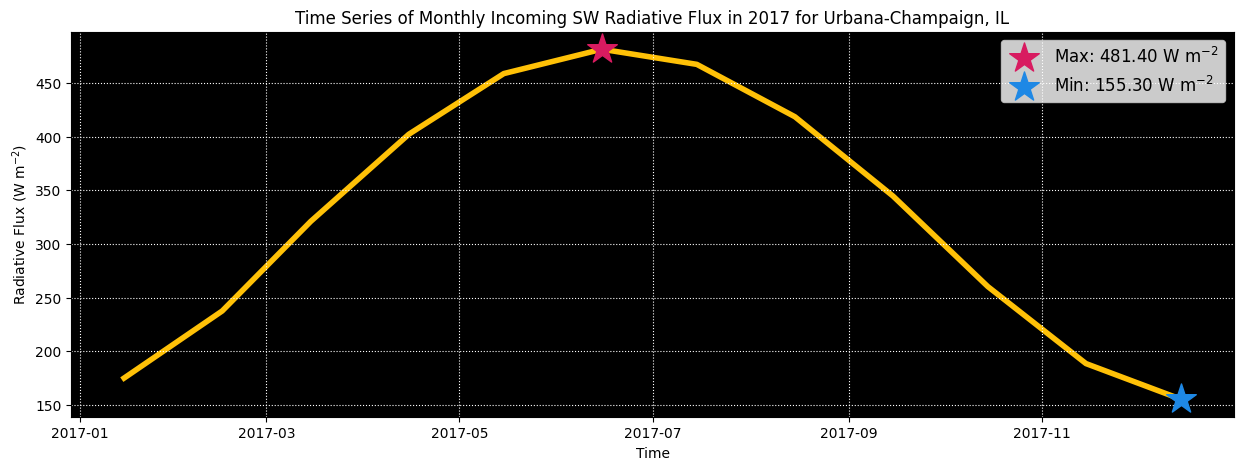

In [16]:
# (e.) OPTIONAL CHALLENGE

# Create plot
fig, ax = plt.subplots(figsize=(15, 5))

max_time = data2017['solar_mon'].idxmax().values
min_time = data2017['solar_mon'].idxmin().values

max = data2017['solar_mon'].max().values
min = data2017['solar_mon'].min().values

# Plot stars where max and min occur
ax.scatter(max_time, max, c='#D81B60', marker='*', s=500, label=f'Max: {max:.2f} W m$^{{-2}}$', zorder=2)
ax.scatter(min_time, min, c='#1E88E5', marker='*', s=500, label=f'Min: {min:.2f} W m$^{{-2}}$', zorder=2)
ax.plot(data2017['solar_mon'].time, data2017['solar_mon'], c="#FFC107", linewidth=4, zorder=1)

ax.legend(loc=0, fontsize=12)
ax.set_facecolor('black')
ax.grid(True, axis='both', linestyle=':', color='white')
ax.set_title('Time Series of Monthly Incoming SW Radiative Flux in 2017 for Urbana-Champaign, IL')
ax.set_ylabel('Radiative Flux (W m$^{-2}$)')
ax.set_xlabel('Time')
